# Pythonics

One of my favourite aspects of python is how diverse and stable its standard library is, for most basic operations there isn't any need to install pypi packages.

Pypi packages can be uploaded by _anyone_, and while the most popular packages are well-maintained and stable, there are _many_ that are not.

## Built-in functions

[https://docs.python.org/3/library/functions.html](https://docs.python.org/3/library/functions.html)

| constructors| meta         | i/o      | iterables    | classes        | objects | maths    |
|-------------|--------------|----------|--------------|----------------|---------|----------|
| bool()      | breakpoint() | format() | all()        | classmethod()  | ascii() | divmod() |
| bytearray() | callable()   | input()  | any()        | delattr()      | hash()  | max()    |
| bytes()     | compile()    | open()   | enumerate()  | dir()          | len()   | min()    |
| chr()       | eval()       | print()  | filter()     | getattr()      | repr()  | sum()    |
| complex()   | exec()       |          | iter()       | globals()      |         | abs()    |
| dict()      | object()     |          | map()        | hasattr()      |         | pow()    |
| float()     | property()   |          | next()       | isinstance()   |         | round()  |
| frozenset() | help()       |          | range()      | issubclass()   |         | bin()    |
| hex()       | id()         |          | reversed()   | locals()       |         |          |
| int()       |              |          | slice()      | memoryview()   |         |          |
| list()      |              |          | sorted()     | setattr()      |         |          |
| oct()       |              |          | zip()        | staticmethod() |         |          |
| ord()       |              |          |              | super()        |         |          |
| set()       |              |          |              | type()         |         |          |
| str()       |              |          |              | vars()         |         |          |
| tuple()     |              |          |              |                |         |          |

## collections

[https://docs.python.org/3/library/collections.html](https://docs.python.org/3/library/collections.html)

```python
from collections import namedtuple, deque, Counter, defaultdict

namedtuple
deque
Counter
defaultdict
```

## itertools

[https://docs.python.org/3/library/itertools.html](https://docs.python.org/3/library/itertools.html)

```python
from itertools import *

count()
cycle()
repeat()

chain()
filterfalse()
groupby()
islice()

product()
permutations()
combinations()

```

## functools

[https://docs.python.org/3/library/functools.html](https://docs.python.org/3/library/functools.html)

```python
from functools import *

cache()
lru_cache()

reduce()
wraps()

```

## Useful applications

### String printf options

In [5]:
print('{}'.format(1.398))
print('{:.2f}'.format(1.398))

print()

print('|{:>10s}-{:s}'.format('hello', 'world'))


1.398
1.40

|     hello-world


In [6]:

val = 1.398
print(f'{val}')
print(f'{val:.2f}')

print()

vals = (1, 300, 2342, 24523)
for v in vals:
    print(f'{v:08d}')

print()

msg = ('hello', 'world')

print('|{:>10s}-{:s}'.format(*msg))

1.398
1.40

00000001
00000300
00002342
00024523

|     hello-world


### Tuple unpacking

In [9]:
a, b = 'a,b'.split(',')
print(a, b)


head, *tail = 'a,b,c,d,e,f'.split(',')
print(head, tail)

a b
a ['b', 'c', 'd', 'e', 'f']


In [10]:
d = {'a': 'b'}

for k, v in d.items():
    print(k, v)

for a in d.items():
    print(a)

for a in enumerate(d.items()):
    print(a)

for i, (k, v) in enumerate(d.items()):
    print(i, k, v)

i, (k, v) = (0, ('a', 'b'))
print(i, k, v)

a b
('a', 'b')
(0, ('a', 'b'))
0 a b
0 a b


### List index slicing

In [11]:
l = list(range(10))
print(l, '\n')

print(l[:2], l[2:])

print(l[-1], l[-2], l[-10])

# rotate
print(l[2:], l[:2])

# take every nth item
print(l[::2])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

[0, 1] [2, 3, 4, 5, 6, 7, 8, 9]
9 8 0
[2, 3, 4, 5, 6, 7, 8, 9] [0, 1]
[0, 2, 4, 6, 8]


### counter is easy!

massively reduce the LOC overhead of your stats collection

In [12]:
from collections import Counter

# taken from https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-12.php
# ew! raymond would be sad.
def word_count(s):
    counts = dict()
    words = s.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def word_counter(s):
  return dict(Counter(s.split()))


print(word_count('the quick brown fox jumps over the lazy dog.'))
print(word_counter('the quick brown fox jumps over the lazy dog.'))

{'the': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'dog.': 1}
{'the': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'dog.': 1}


---

## timezones: stdlib vs pypi

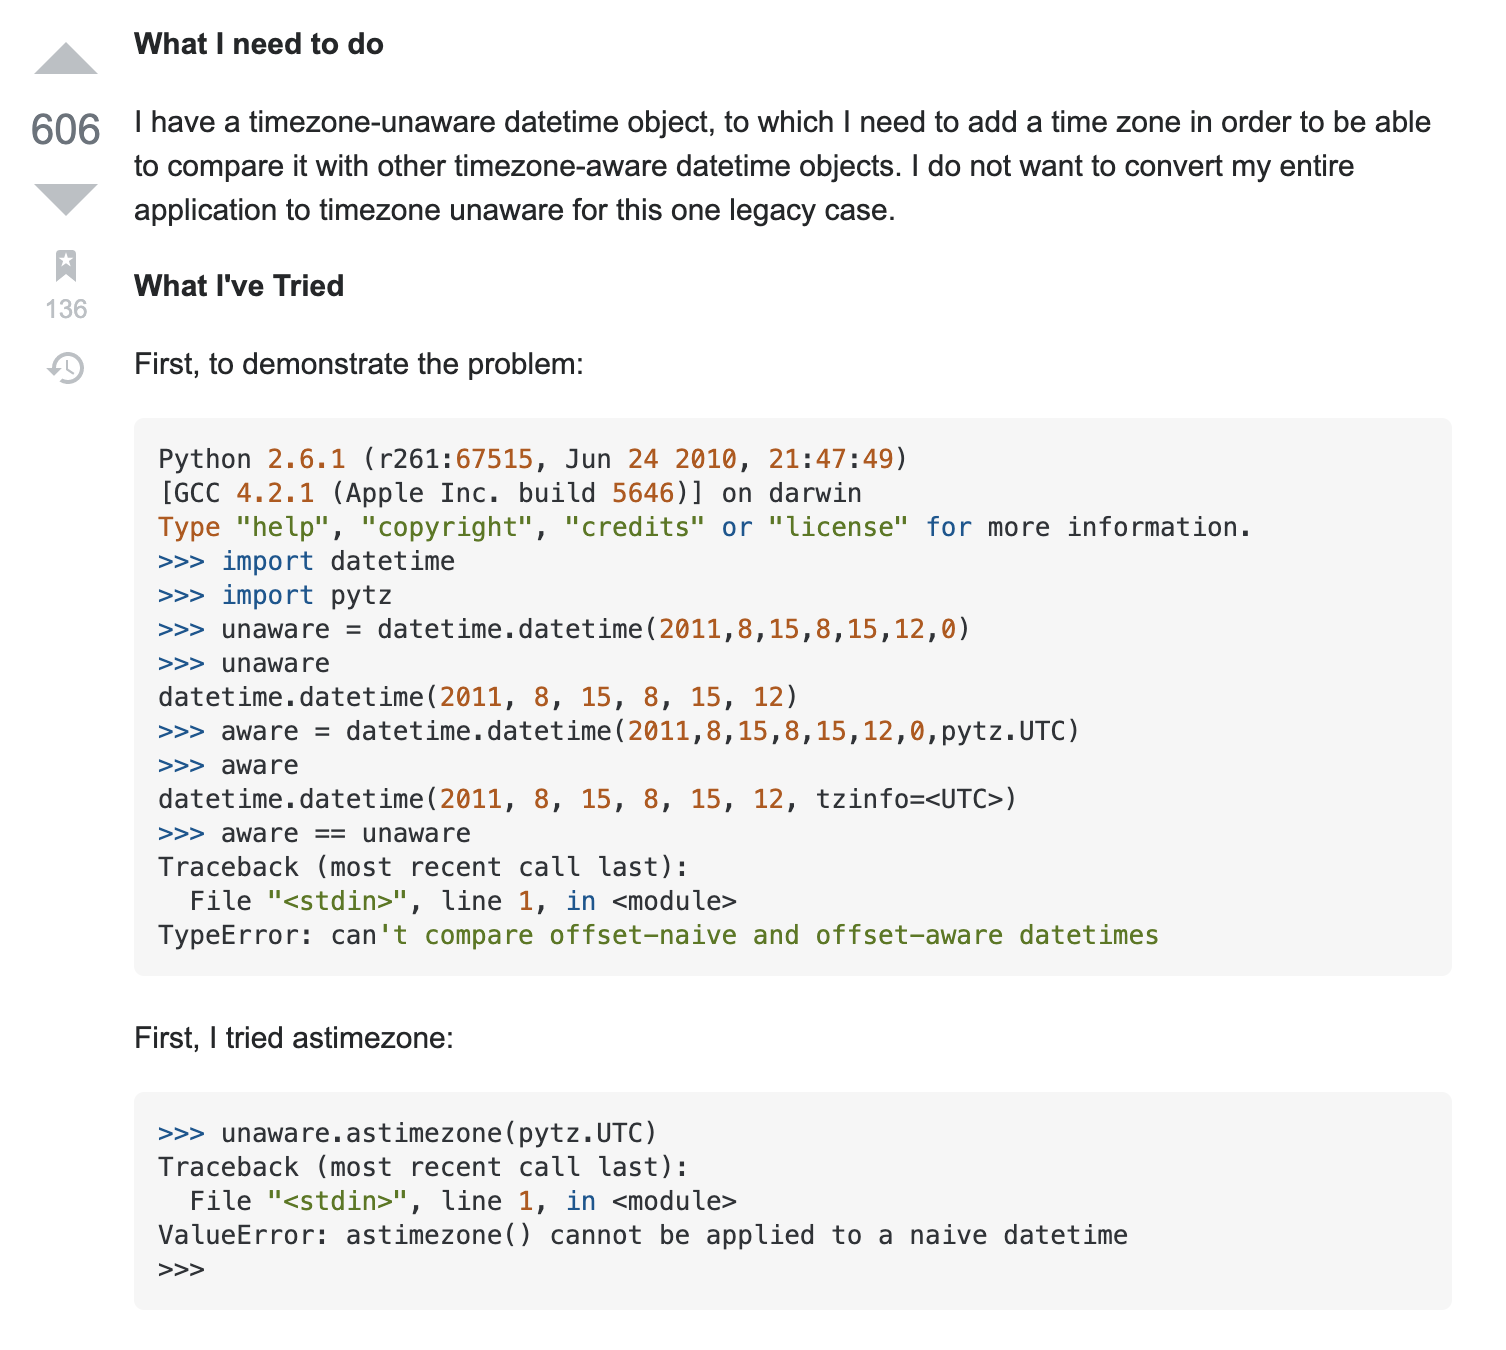

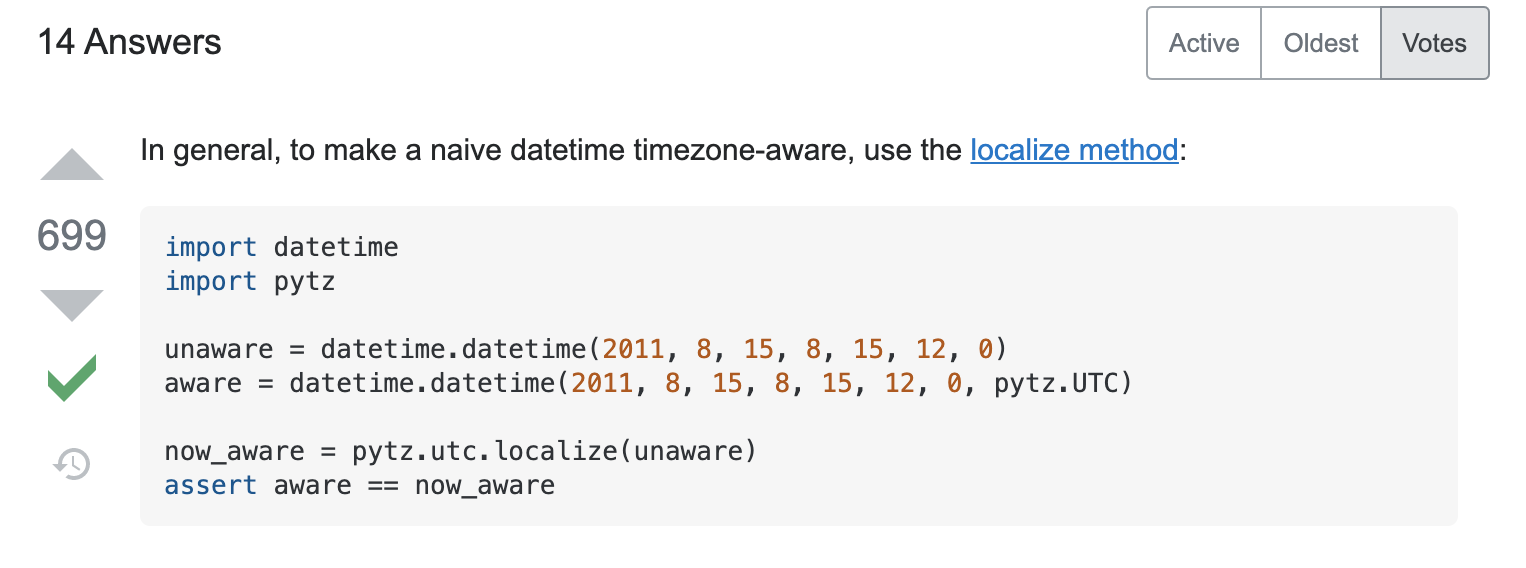

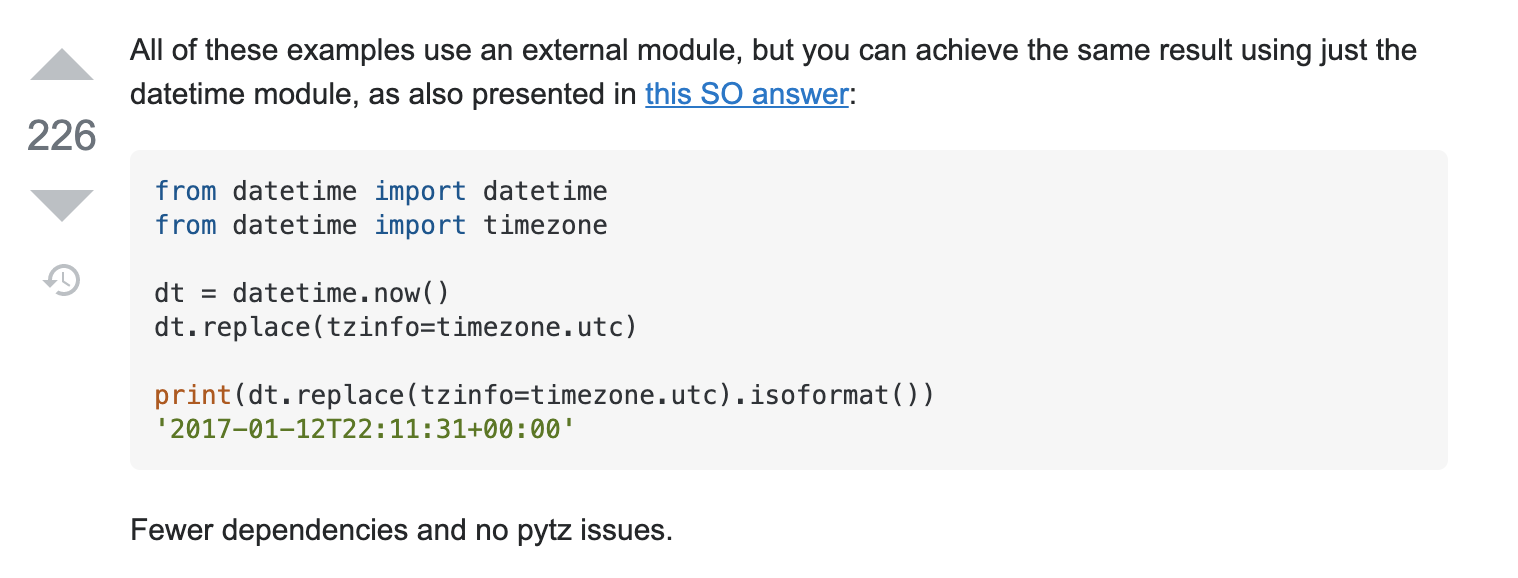

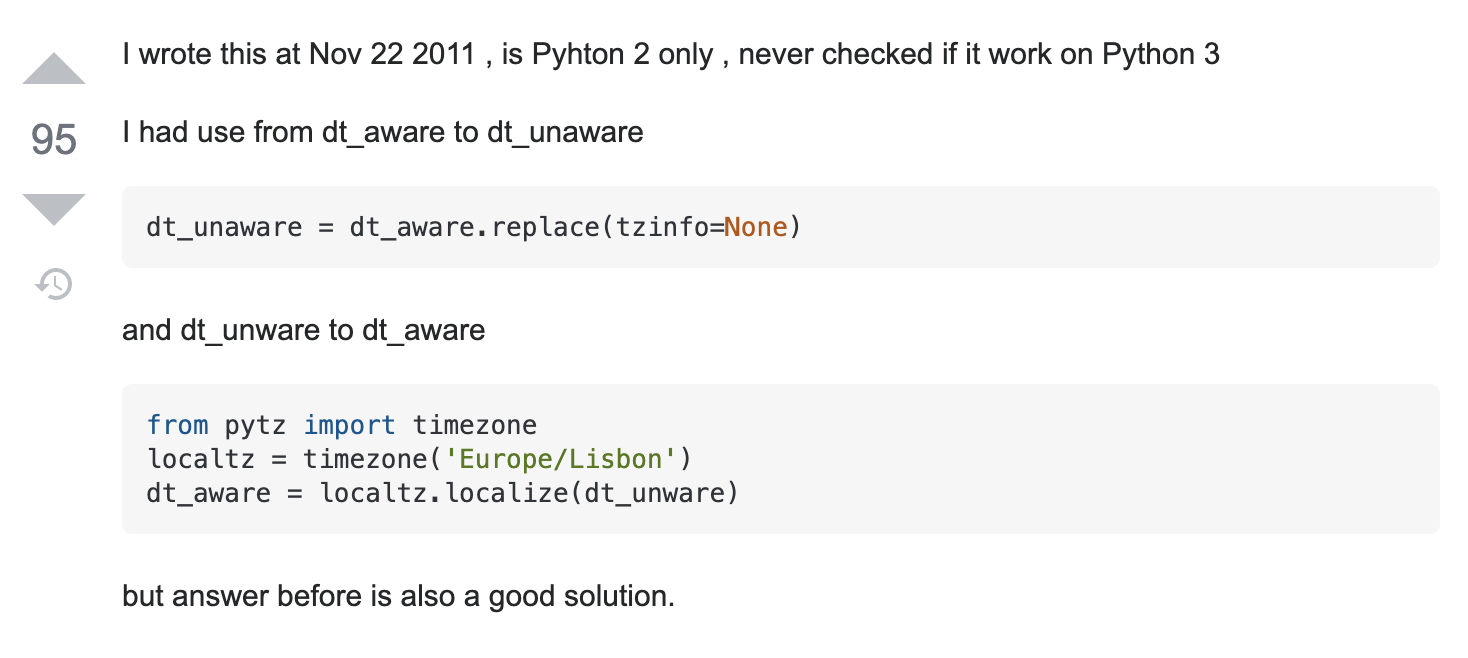

[https://docs.python.org/3/library/datetime.html](https://docs.python.org/3/library/datetime.html)

In [27]:
from datetime import datetime, timezone, timedelta

print(str(datetime.now()))
datetime.now()

2021-05-04 19:52:16.446839


datetime.datetime(2021, 5, 4, 19, 52, 16, 447357)

In [25]:
datetime.utcnow()

datetime.datetime(2021, 5, 4, 9, 52, 5, 839129)

In [57]:
from datetime import datetime, timezone, timedelta

def current_datetime_in_tz(utc_offset=0):
     return datetime.now(timezone(timedelta(seconds=utc_offset))).replace(microsecond=0)

def current_datetime():
    import time
    return current_datetime_in_tz(-time.timezone)

def convert_datetime_timezone(dt, utc_offset=0):
    return dt.astimezone(timezone(timedelta(hours=utc_offset)))

now = current_datetime_in_tz(36000)
print(now)
print(current_datetime())
print(convert_datetime_timezone(now, 8))

2021-05-04 20:27:49+10:00
2021-05-04 20:27:49+10:00
2021-05-04 18:27:49+08:00


In [5]:
#!/usr/bin/env python3

def iso8601_str1(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S%z')

def iso8601_str2(dt):
    return dt.replace(microsecond=0).isoformat()

print(iso8601_str1(current_datetime(10)))
print(iso8601_str2(current_datetime(10)))

2021-05-04T19:45:44+1000
2021-05-04T19:45:44+10:00


In [ ]:
from datetime import time, tzinfo, timedelta

class TZ1(tzinfo):
    def utcoffset(self, dt): return timedelta(hours=1)
    def dst(self, dt):       return timedelta(0)
    def tzname(self,dt):     return "+01:00"
    def  __repr__(self):     return f"{self.__class__.__name__}()"

In [61]:
from datetime import tzinfo, timedelta
from dataclasses import dataclass
from typing import ClassVar

@dataclass
class TZ(tzinfo):
    offset: ClassVar[timedelta]
    def utcoffset(self, dt): return self.offset
    def dst(self, dt):       return timedelta(0)
    def tzname(self,dt):     return self.__class__.__name__,
    def  __repr__(self):     return f"{self.__class__.__name__}()"


@dataclass
class AEST(TZ):
    offset: ClassVar[timedelta] = timedelta(hours=10)


print(datetime.now(tz=AEST()).isoformat())

2021-05-04T20:57:50.344716+10:00


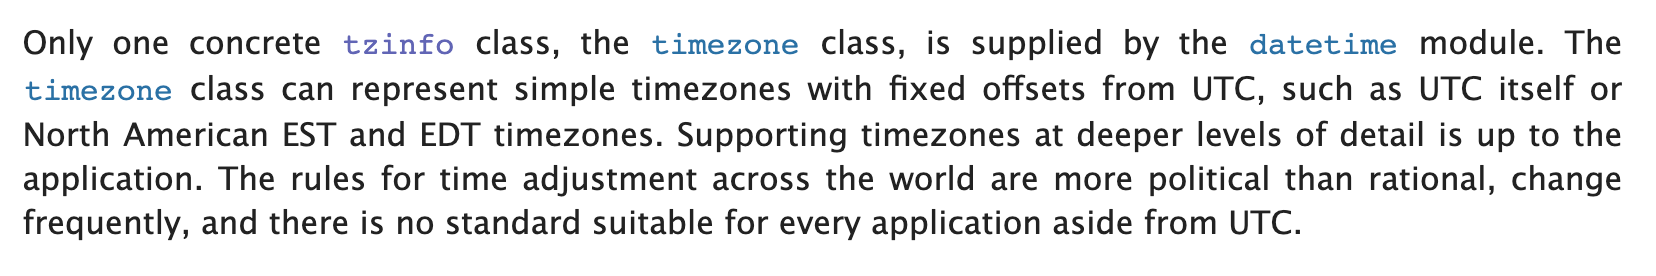

In [49]:
# How do you get the current timezone?
import time

(time.timezone, time.strftime("%z"), time.strftime("%Z"))

(-36000, '+1000', 'AEST')

In [101]:
a = list(range(10))

for i in filter(lambda x: x % 2 == 1, a):
    print(i)

1
3
5
7
9


### Line continuations in string definitions

watch out for this!

In [66]:
a = [
    'hello'
    'world'
]

print('hello' in a)
print('world' in a)

print(a)

False
False
['helloworld']


### File iteration

### Check if all items in one list are also in another

In [3]:
l1 = [1,2,3]
l2 = [1,2,4]


%timeit all(el in l2 for el in l1)
input()

%timeit all(map(l2.__contains__, l1))
input()

%timeit set(l1).issuperset(l1)

651 ns ± 10.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


684 ns ± 38.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


559 ns ± 20.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


452 ns ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


''

In [16]:
fpath, text = 'text.csv', '''\
id,name
1,ben
2,jane
3,rover
4,daisy
'''

with open(fpath, 'w') as ostream:
    ostream.write(text)

### Reading files

In [18]:
with open(fpath) as istream:
    print(list(line for line in istream))
    
input()    

with open(fpath) as istream:
    print(list(istream))

input()    

print(list(open(fpath)))

['id,name\n', '1,ben\n', '2,jane\n', '3,rover\n', '4,daisy\n']
['id,name\n', '1,ben\n', '2,jane\n', '3,rover\n', '4,daisy\n']


In [19]:
with open(fpath) as istream:
    for line in istream:
        print(line.strip())

input()

with open(fpath) as istream:
    for line in map(str.strip, istream):
        print(line)

id,name
1,ben
2,jane
3,rover
4,daisy

id,name
1,ben
2,jane
3,rover
4,daisy


### map is lazy

_the same goes for all of the iterable functions_

In [20]:
def trns(ch):
    print(f'called with {ch}')
    return str(ch)

for i in map(trns, range(2)):
    print(i)
    break
    
print('----')

print(list(map(trns, range(2))))

called with 0
0
----
called with 0
called with 1
['0', '1']


k = 's'
print(k in 'suss')

input()

print(k == 'e' or k == 's')

input()

print(k in ('e', 's'))

In [21]:
import itertools
import sys

import string
from collections import deque

shift=1
rot = deque(string.ascii_lowercase)
rot.rotate(-shift)
lookup = dict(zip(string.ascii_lowercase, rot))

def find(char, lookup):
    try:
        return lookup.get(char, char)
    except KeyError:
        return char

def encode(msg):
    return ''.join(list(map(lambda x: find(x, lookup), msg)))

print(encode('hello world'))
%timeit encode('hello world')

ifmmp xpsme
7.51 µs ± 82.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
shift=1
rot = deque(string.ascii_lowercase)
rot.rotate(-shift)
lookup = dict(zip(string.ascii_lowercase, rot))

def find(char, lookup):
    return lookup.get(char, char)

def encode(msg):
    return ''.join(list(map(lambda x: lookup.get(x, x), msg)))

msg = 'hello world'
%timeit encode('hello world')

4.58 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
import string

def encode(msg, shift=1):
    lookup = dict(zip(
        string.ascii_lowercase,
        string.ascii_lowercase[shift:] + string.ascii_lowercase[0:shift]
    ))
    return ''.join(list(map(lambda x: lookup.get(x, x), msg)))

print(encode('hello world'))

%timeit encode('hello world')

ifmmp xpsme
9.79 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
import string

lookup = dict(zip(
    string.ascii_lowercase,
    string.ascii_lowercase[shift:] + string.ascii_lowercase[0:shift]
))

def encode(msg, shift=1):
    return ''.join(list(map(lambda x: lookup.get(x, x), msg)))

print(encode('hello world'))

%timeit encode('hello world')

ifmmp xpsme
4.54 µs ± 77.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
import string

lookup = str.maketrans(
    string.ascii_lowercase,
    string.ascii_lowercase[shift:] + string.ascii_lowercase[0:shift]
)

def encode(msg):
    return msg.translate(lookup)

print(encode('hello world'))

%timeit encode('hello world')

ifmmp xpsme
776 ns ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
